In [1]:
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random

from math import ceil

from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')


In [2]:
from razor import Block, inputs, outputs, Pipeline
from razor.api import project_space_path
import razor
from razor import Technology, LibraryMode
from razor.core.blocks import ContainerExecutor
from razor.core.blocks.transports import FileTransport


In [3]:
@outputs.atomic.generic('config')
class Configs(Block):
    def run(self, config):
        
        dic = {
          "TARGET": "sales",
          "END_TRAIN": 1913,
          "MAIN_INDEX": [
            "id",
            "d"
          ],
          "train_path": "M5Forecasting/sales_train_validation.csv",
          "prices_df": "M5Forecasting/sell_prices.csv",
          "calendar_path" : "M5Forecasting/calendar.csv"
        }
        config.put(dic)
        

In [4]:
configs = (
    Configs()
    .config(transport=FileTransport)
)

In [5]:
@inputs.atomic.string('path')
@inputs.atomic.generic('config')
class HeavyOp1(Block):
    def run(self, path, config):
        import pandas as pd
        import logging
        
        logging.info("Test")
        self.logger.info("Reading df")
        train_df=pd.read_csv(path, config)
        

In [6]:
heavy_op1 = (
    HeavyOp1()
    .path('M5Forecasting/train_df.csv', adapter=project_space_path)  # (series, string)
    .config(configs.config)
    .executor(ContainerExecutor(cores=2, memory=8192))
)

In [7]:
p = Pipeline("heavy_op1", targets=[heavy_op1], env=Technology.PYTHON)  #preprocess


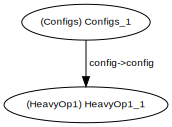

In [8]:
p.show()

In [9]:
deployed_pipeline = razor.api.engines('DS-engine').execute(pipeline=p)


In [12]:
deployed_pipeline

PlatformPipelineRun(project_id='c0b26d85-a4c9-44f5-9d0e-f540dd2de644', pipeline_id='085c62b6-de3a-11ea-9a36-bbbb6f98a62b', pipeline_name='heavy_op1', pipeline_run_id='7783e41c-dd66-4742-bd95-c7554c3ed983', pipeline_version=None, comment=None, created_on='2020-08-14T14:25:42.649+0000', start_time=None, end_time=None, eta=0, run_at=1597415142649, run_duration=0, compute_time=0, wait_time=0, ran_by_user=RanByUser(user_name='Ayan Basak', email='ayan.basak@razorthink.com'), status='IN_PROGRESS', block_status=[PlatformPipelineBlockRun(pipeline_run_id='7783e41c-dd66-4742-bd95-c7554c3ed983', pipeline_name='heavy_op1', pipeline_status='IN_PROGRESS', block_id='4a82651b-015f-4c50-b152-71e3c63d0af5', block_run_id='9c6f2b3c-80b5-4af5-a71e-cb6f33a1f14a', block_name='Configs_1', resource_spec=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gpu=0, use_gpu_if_available=False, additional_resource_spec={}, run_env='PYTHON'), technology='PYTHON', status='READY_TO_GO', containers=[], cluster_id='4a82651b-015f-4c50-b152-71e3c63d0af5', _log=None, _metric=None, wait_time=0, compute_time=0, start_time=None, end_time=None, queued_at='2020-08-14T14:25:43.000+0000'), PlatformPipelineBlockRun(pipeline_run_id='7783e41c-dd66-4742-bd95-c7554c3ed983', pipeline_name='heavy_op1', pipeline_status='IN_PROGRESS', block_id='73c663df-cac4-47d9-8efc-33f1b95aad7b', block_run_id='fd20e9e5-7b44-4060-a25f-394e102ab079', block_name='HeavyOp1_1', resource_spec=ResourceAllocated(cores=2, memory=8192, use_gpu=False, gpu=0, use_gpu_if_available=False, additional_resource_spec={}, run_env='PYTHON'), technology='PYTHON', status='YET_TO_START', containers=[], cluster_id='73c663df-cac4-47d9-8efc-33f1b95aad7b', _log=None, _metric=None, wait_time=0, compute_time=0, start_time=None, end_time=None, queued_at=None)], run_number=73, pipeline_variable_list=[], block_run_details=[BlockRunDetail(block_id='4a82651b-015f-4c50-b152-71e3c63d0af5', block_run_id='9c6f2b3c-80b5-4af5-a71e-cb6f33a1f14a', block_name='Configs_1', technology='PYTHON', log_path=None, input_parameters='{}', output_parameters=None, status='READY_TO_GO', created_at='2020-08-14T14:25:42.687+0000', queued_at='2020-08-14T14:25:43.000+0000', start_time=None, end_time=None, compute_time=0, wait_time=0, run_time=0, block_run_output_list=[BlockRunOutputList(output_id='13c6899f-6eb0-48ff-9cc8-cb9f748c8b30', output_name='config', created_on='2020-08-14T14:25:42.688+0000', output_status='YET_TO_START', block_transport='FILE')], resource_allocated=ResourceAllocated(cores=1, memory=1024, use_gpu=False, gpu=0, use_gpu_if_available=False, additional_resource_spec={}, run_env='PYTHON')), BlockRunDetail(block_id='73c663df-cac4-47d9-8efc-33f1b95aad7b', block_run_id='fd20e9e5-7b44-4060-a25f-394e102ab079', block_name='HeavyOp1_1', technology='PYTHON', log_path=None, input_parameters=None, output_parameters=None, status='YET_TO_START', created_at='2020-08-14T14:25:42.702+0000', queued_at=None, start_time=None, end_time=None, compute_time=0, wait_time=0, run_time=0, block_run_output_list=[], resource_allocated=ResourceAllocated(cores=2, memory=8192, use_gpu=False, gpu=0, use_gpu_if_available=False, additional_resource_spec={}, run_env='PYTHON'))], pipeline_json='{\n  "id": "085c62b6-de3a-11ea-9a36-bbbb6f98a62b",\n  "projectId": "c0b26d85-a4c9-44f5-9d0e-f540dd2de644",\n  "name": "heavy_op1",\n  "description": "",\n  "blocks": [\n    {\n      "name": "HeavyOp1_1",\n      "id": "73c663df-cac4-47d9-8efc-33f1b95aad7b",\n      "artifact_id": null,\n      "class_name": "HeavyOp1",\n      "code": "eJxtUk1v0zAYTpr0Q90YHMYGF7QDh27TKtq1WychxOgFCBTouCLLiZ061LWzxB4qaiUuE5rkG+a+/Sn+Dthpx3aYD/br9/t93ueH//uP5xRHbUaUS5Qm0Zji5i1Zq8cgw2SKMigwyMeYYsEZiCjMc/1LN4ij1sEEju+yqVooEyoSlmvli2mKjVLVXmN4Nv2QtrR6lMHvPGtGPMPNkPJonC8frcqvrGD8z/VcqyoAiEcA6EGutlpH+3Gn190Pw+ioc9DrHB3iVvisHbcP2+2424Z6IPTQRDVUHYAJR5JiE6lq5gMTZkUvk0ybxtdAnFAKYskikXC2HOf+zTiFyaiN9h5YzgL+D9LnCH+2n3NTrxF4gRNUAj/o9w+QixzqzL3idef+zL8sodKV6zoz56tnZK+QvUt/5s5KV6V5GTknjm4MAkf5n3EutKoPMUQJG22hWAszS